<a href="https://colab.research.google.com/github/hap6v6/ML_study/blob/main/1_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# pandas 패키지
import pandas as pd

In [4]:
pd.__version__

'1.5.3'

# Read Data

In [5]:
#pd.read_csv('불러올 파일 위치')
#index_col='movieId': movieId column을 index로 사용
movies = pd.read_csv('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/movies.csv', index_col='movieId')

In [ ]:
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [ ]:
movies.shape # 데이터 행의 수, 열의 수
movies.head(10) # 상위 10개 데이터만 가져오기
movies.tail() # 하위 10개 데이터만 가져오기
movies.sample(10) # 랜덤으로 10개 골라주기

,title,genres
movieId,,
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama
193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [ ]:
movies.columns # 데이터 프레임 안의 column 이름 출력

Index(['title', 'genres'], dtype='object')

# Save Data

In [ ]:
movies.to_csv('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/save_test.csv')

# 개봉연도 분석
## 개봉연도 데이터 정제하기 (데이터 전처리, Preprocessing)

In [ ]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [ ]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)') #괄호 제거

In [ ]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

## 결측값 핸들링하기

In [ ]:
# NaN (Not a Number, 결측치)
# movies[movies['year'].isnull()]

In [ ]:
movies['year'] = movies['year'].fillna('2050')

In [ ]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '2050', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

## 데이터에 가장 많이 출현하는 개봉연도를 찾아주세요.

In [ ]:
# movies['year'].value_counts()

### 시각화

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt #seaborn figure 크기 조절을 위해서

<Axes: xlabel='year', ylabel='count'>

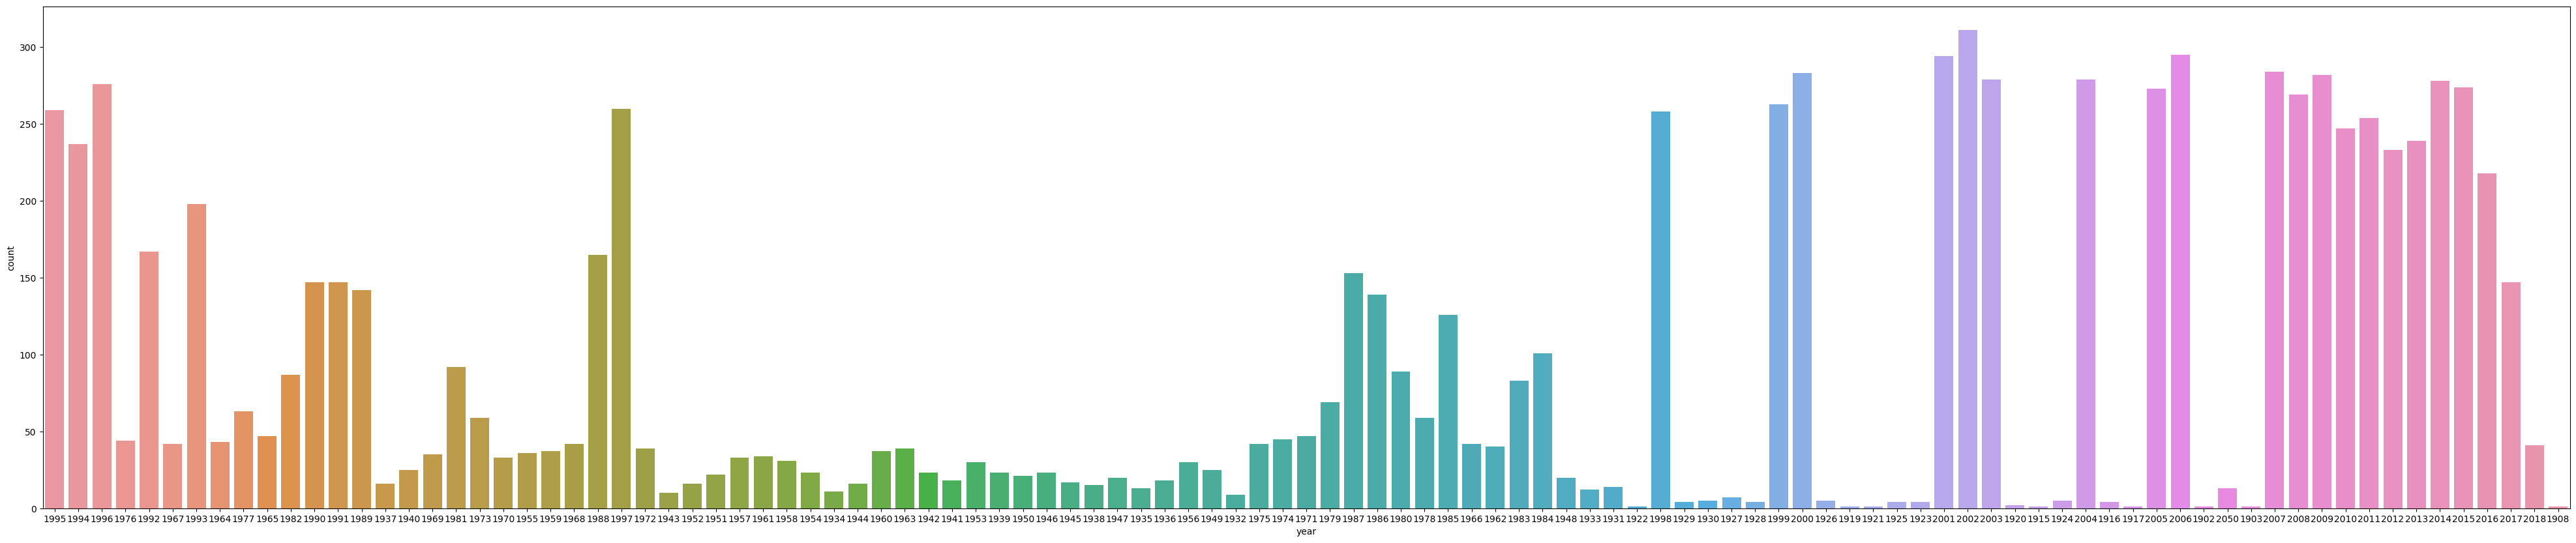

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(data=movies, x='year')

# 장르 분석

In [ ]:
movies['genres']

In [ ]:
sample_genres = movies['genres'][1]
sample_genres

'Adventure|Animation|Children|Comedy|Fantasy'

In [ ]:
sample_genres.split("|")

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [ ]:
genres_list = list(movies['genres'].apply(lambda x: x.split("|")))
genres_list[:3]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance']]

In [ ]:
flat_list = []
for sublist in genres_list:
  for item in sublist:
    flat_list.append(item)

In [ ]:
flat_list #중복된 값 많음

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [ ]:
genres_unique = list(set(flat_list)) #중복 제거
genres_unique

['Action',
 'Horror',
 'Adventure',
 'Western',
 'Romance',
 'Thriller',
 'Children',
 'Sci-Fi',
 'Crime',
 'Mystery',
 'Drama',
 'Film-Noir',
 'IMAX',
 '(no genres listed)',
 'War',
 'Animation',
 'Musical',
 'Fantasy',
 'Documentary',
 'Comedy']

In [ ]:
len(genres_unique)

20